# Natural Language Processing Project

In this notebook, I conducted a research analysis on the SMS Spam Collection Dataset. The SMS Spam Collection is a set of SMS tagged messages that have been collected for SMS Spam research. It contains one set of SMS messages in English of 5,574 messages, tagged acording being ham (legitimate) or spam. My research focused on exploring and answering several key questions related to the dataset.

# Research questions : 
1.Compare ham and spam messages, are there more ham or spam messages?
2.Which are 10 most used words in spam messages?
3.Which are 10 most used words in ham messages?
4.What is the frequency of 10 most used words in spam messages?
5.What is the frequency of 10 most used words in ham messages?
6.What are the percentage of ham and spam messages?
7.Show the word clouds for spam and ham messages.
8.Can we predict the length of the text message (number of characters) based on wether it is classified as spam or not?
9.Can we predict if a phrase is ham or spam using Naive Bayes model?

In [1]:
# Import libraries and modules
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
import numpy as np
from sklearn.metrics import classification_report
from sklearn.linear_model import LinearRegression
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Read the CSV file and display
df = pd.read_csv('C:\\Users\\User\\OneDrive\\Desktop\\spam.csv', encoding='latin-1')
df

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [3]:
# dropping NaN values
df.drop(['Unnamed: 2','Unnamed: 3', 'Unnamed: 4'], axis = 1, inplace = True)
df

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [4]:
# counting NaN values
df.isna().sum()

v1    0
v2    0
dtype: int64

In [5]:
# dropping duplicated values
df['v2'].drop_duplicates(inplace = True)

In [6]:
# Clean the data
def clean_text(text):
    # Remove HTML tags
    text = re.sub('<.*?>', '', text)
    # Remove non-alphabetic characters and convert to lowercase
    text = re.sub('[^a-zA-Z]', ' ', text).lower()
    # Tokenize the text
    words = nltk.word_tokenize(text)
    # Remove stopwords
    words = [w for w in words if w not in stopwords.words('english')]
    # Stem the words
    stemmer = PorterStemmer()
    words = [stemmer.stem(w) for w in words]
    # Join the words back into a string
    text = ' '.join(words)
    return text

In [7]:
# v1 = spam or ham
# v2 = message

# 1.Compare ham and spam messages, are there more ham or spam messages? 

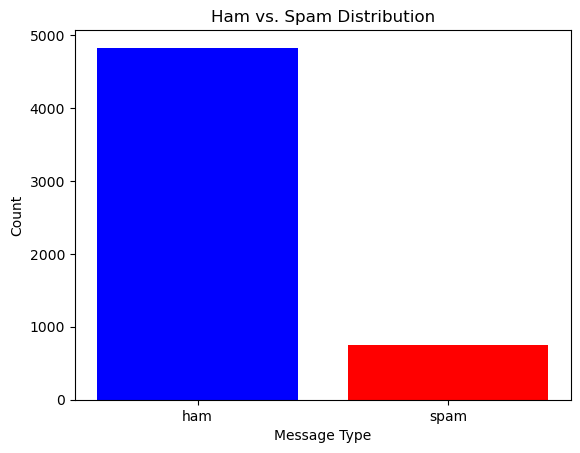

In [8]:
# Count the occurrences of ham and spam
spam_count = df['v1'].value_counts()

# Define colors for ham and spam
colors = ['blue', 'red']

# Create a bar plot with specified colors
plt.bar(spam_count.index, spam_count.values, color=colors)

# Add labels and title
plt.xlabel('Message Type')
plt.ylabel('Count')
plt.title('Ham vs. Spam Distribution')

# Show the plot
plt.show()


As we can see from the graph, our dataset contains more ham messages than spam messages.Ham messages are nearly 5000 while spam messages nearly 1000.

# 2.Which are 10 most used words in spam messages? 
# 3.Which are 10 most used words in ham messages?

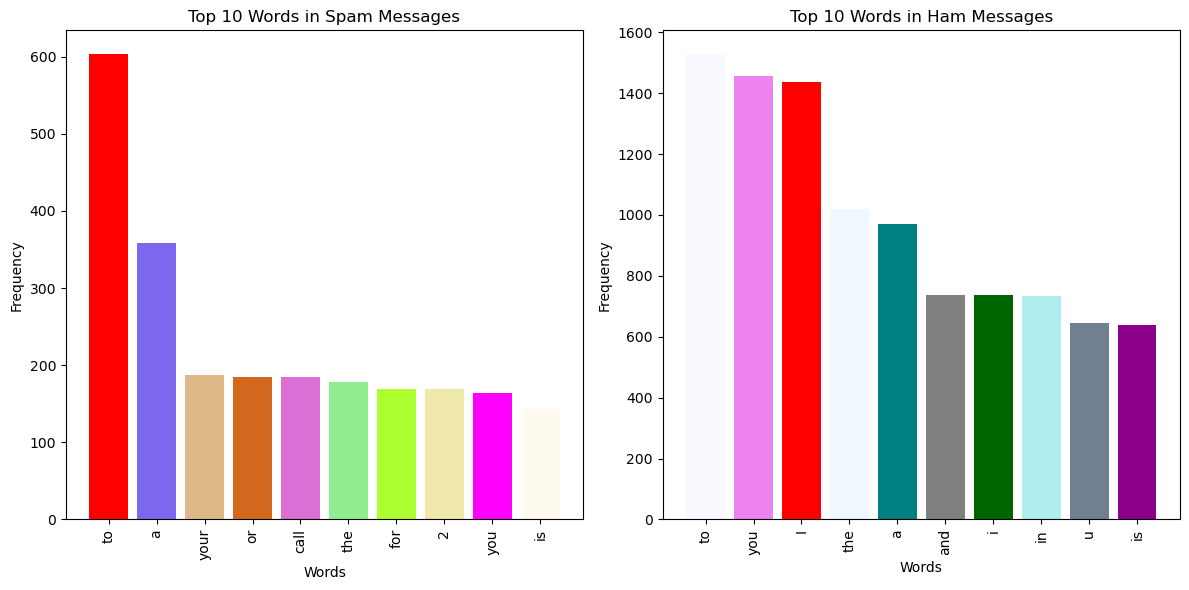

In [9]:
# Split the dataset into spam and ham messages
spam_messages = df[df['v1'] == 'spam']
ham_messages = df[df['v1'] == 'ham']

# Concatenate all spam messages into a single string
spam_all_messages = ' '.join(spam_messages['v2'].values)

# Concatenate all ham messages into a single string
ham_all_messages = ' '.join(ham_messages['v2'].values)

# Split the spam string into individual words
spam_words = spam_all_messages.split()

# Split the ham string into individual words
ham_words = ham_all_messages.split()

# Count the frequency of each word in spam messages
spam_word_counts = pd.Series(spam_words).value_counts()

# Count the frequency of each word in ham messages
ham_word_counts = pd.Series(ham_words).value_counts()

# Select the top 10 most frequent words in spam messages
top_spam_words = spam_word_counts.head(10)

# Select the top 10 most frequent words in ham messages
top_ham_words = ham_word_counts.head(10)

# Define colors for each bar
colors_spam = np.random.choice(list(plt.cm.colors.CSS4_COLORS.keys()), len(top_spam_words))
colors_ham = np.random.choice(list(plt.cm.colors.CSS4_COLORS.keys()), len(top_ham_words))

# Create subplots for spam and ham word frequencies
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

# Create a bar plot for spam word frequencies
axes[0].bar(top_spam_words.index, top_spam_words.values, color=colors_spam)
axes[0].set_xlabel('Words')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Top 10 Words in Spam Messages')
axes[0].tick_params(axis='x', rotation=90)

# Create a bar plot for ham word frequencies
axes[1].bar(top_ham_words.index, top_ham_words.values, color=colors_ham)
axes[1].set_xlabel('Words')
axes[1].set_ylabel('Frequency')
axes[1].set_title('Top 10 Words in Ham Messages')
axes[1].tick_params(axis='x', rotation=90)

# Adjust the spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()


As we can see there are several words which appears in both messages.Words such as "to","you","is","a","the" appears in spam and ham messages. While there are other words which appears only in spam messages, such as "your","or","call","2","for" and the ones which appear in ham messages "I","and".

# 4.What is the frequency of 10 most used words in spam messages? 
# 5.What is the frequency of 10 most used words in ham messages?

In [10]:
# Split the dataset into spam and ham messages
spam_messages = df[df['v1'] == 'spam']
ham_messages = df[df['v1'] == 'ham']

# Concatenate all spam messages into a single string
spam_all_messages = ' '.join(spam_messages['v2'].values)

# Concatenate all ham messages into a single string
ham_all_messages = ' '.join(ham_messages['v2'].values)

# Split the spam string into individual words
spam_words = spam_all_messages.split()

# Split the ham string into individual words
ham_words = ham_all_messages.split()

# Count the frequency of each word in spam messages
spam_word_counts = pd.Series(spam_words).value_counts()

# Count the frequency of each word in ham messages
ham_word_counts = pd.Series(ham_words).value_counts()

# Create a DataFrame for spam word counts
spam_word_counts_df = pd.DataFrame({'Word': spam_word_counts.index, 'Frequency': spam_word_counts.values})
spam_word_counts_df = spam_word_counts_df.sort_values('Frequency', ascending=False)

# Create a DataFrame for ham word counts
ham_word_counts_df = pd.DataFrame({'Word': ham_word_counts.index, 'Frequency': ham_word_counts.values})
ham_word_counts_df = ham_word_counts_df.sort_values('Frequency', ascending=False)

# Display the spam word counts
print("Spam Word Frequencies:")
print(spam_word_counts_df.head(10))

# Display the ham word counts
print("\nHam Word Frequencies:")
print(ham_word_counts_df.head(10))


Spam Word Frequencies:
   Word  Frequency
0    to        604
1     a        358
2  your        187
3    or        185
4  call        185
5   the        178
6   for        169
7     2        169
8   you        164
9    is        143

Ham Word Frequencies:
  Word  Frequency
0   to       1530
1  you       1458
2    I       1436
3  the       1019
4    a        969
5  and        738
6    i        736
7   in        734
8    u        645
9   is        638


We can see that most used word in Spam messages is "to" by 604 times, followed by "a" and "your" by 358 and 187 times.
While in Ham messages "to" is used more, it has a frequency of 1530, followed by "you" and "I" by 1458 and 1436. Results for the other words are in the table above.

# 6.What are the percentage of ham and spam messages?

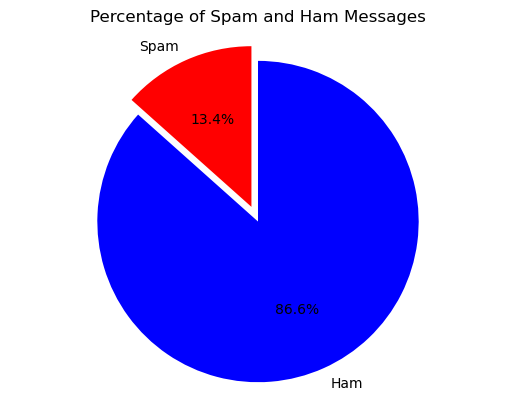

In [11]:
# Calculate the count of spam and ham messages
spam_count = df[df['v1'] == 'spam'].shape[0]
ham_count = df[df['v1'] == 'ham'].shape[0]

# Calculate the percentage of spam and ham messages
total_count = spam_count + ham_count
spam_percentage = (spam_count / total_count) * 100
ham_percentage = (ham_count / total_count) * 100

# Create a pie chart
labels = ['Spam', 'Ham']
sizes = [spam_percentage, ham_percentage]
colors = ['red', 'blue']
explode = (0.1, 0)  # Explode the first slice (spam) to highlight it
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)

# Add a title
plt.title('Percentage of Spam and Ham Messages')

# Equal aspect ratio ensures that pie is drawn as a circle
plt.axis('equal')

# Display the pie chart
plt.show()

We can see that our dataset contains 13.4% of Spam messages and 86.6% of Ham messages. 

# 7.Show the word clouds for spam and ham messages.

In [12]:
!pip install wordcloud

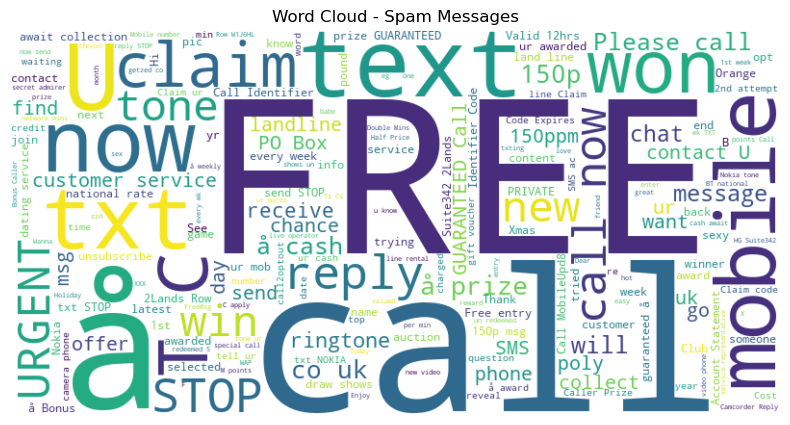

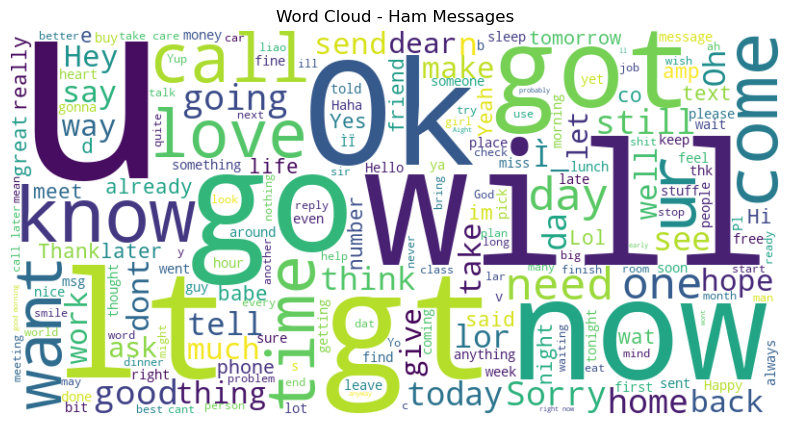

In [13]:
from wordcloud import WordCloud

# Separate spam and ham messages
spam_messages = df[df['v1'] == 'spam']
ham_messages = df[df['v1'] == 'ham']

# Generate word cloud for spam messages
spam_text = ' '.join(spam_messages['v2'])
spam_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(spam_text)

# Generate word cloud for ham messages
ham_text = ' '.join(ham_messages['v2'])
ham_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(ham_text)

# Display word cloud for spam messages
plt.figure(figsize=(10, 5))
plt.imshow(spam_wordcloud, interpolation='bilinear')
plt.title('Word Cloud - Spam Messages')
plt.axis('off')
plt.show()

# Display word cloud for ham messages
plt.figure(figsize=(10, 5))
plt.imshow(ham_wordcloud, interpolation='bilinear')
plt.title('Word Cloud - Ham Messages')
plt.axis('off')
plt.show()

#  8.Can we predict the length of the text message (number of characters) based on wether it is classified as spam or not?

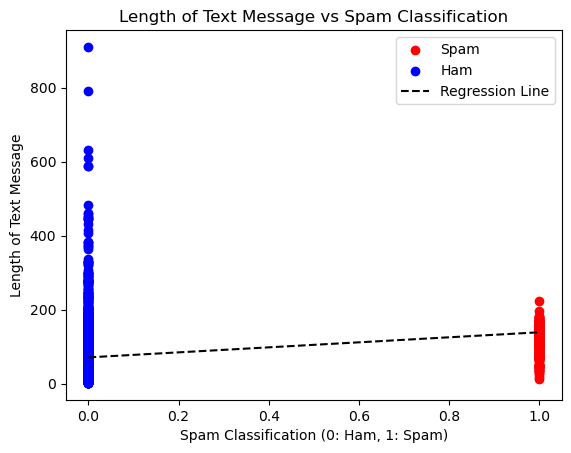

Slope: 67.84250424842719
Intercept: 71.02362694300518


In [14]:
# Create a new column for spam classification (0: Ham, 1: Spam)
df['Spam'] = df['v1'].map({'ham': 0, 'spam': 1})

# Calculate the length of each text message
df['Message Length'] = df['v2'].str.len()

# Split the data based on spam classification
spam_data = df[df['Spam'] == 1]
ham_data = df[df['Spam'] == 0]

# Scatter plot for spam messages (red)
plt.scatter(spam_data['Spam'], spam_data['Message Length'], color='red', label='Spam')

# Scatter plot for ham messages (blue)
plt.scatter(ham_data['Spam'], ham_data['Message Length'], color='blue', label='Ham')

# Create and fit the linear regression model
model = LinearRegression()
model.fit(df[['Spam']], df['Message Length'])

# Obtain the coefficients (slope and intercept)
slope = model.coef_[0]
intercept = model.intercept_

# Generate x values for the regression line
x_values = np.array([0, 1])
y_values = slope * x_values + intercept

# Plot the regression line
plt.plot(x_values, y_values, color='black', linestyle='--', label='Regression Line')

# Set plot labels and title
plt.xlabel('Spam Classification (0: Ham, 1: Spam)')
plt.ylabel('Length of Text Message')
plt.title('Length of Text Message vs Spam Classification')

# Add legend
plt.legend()

# Display the plot
plt.show()

# Print the slope and intercept values
print('Slope:', slope)
print('Intercept:', intercept)

The slope (67.84250424842719) indicates the change in the predicted length of the text message for each unit change in the predictor variable (spam classification). In this case, it suggests that, on average, a text message classified as spam is expected to be approximately 67.84 characters longer than a non-spam message.

The intercept (71.02362694300518) represents the predicted length of a text message when the predictor variable (spam classification) is zero. In other words, it gives an estimate of the length of a non-spam message.

Therefore, based on these results, it suggests that there is a relationship between the spam classification and the length of the text message. The model indicates that, on average, spam messages tend to be longer than non-spam messages.

# 9.Can we predict if a phrase is ham or spam using Naive Bayes model?

In [15]:
# Select relevant columns
data = df[['v1', 'v2']]
data.columns = ['label', 'text']

# Preprocess the data
data['label'] = data['label'].map({'ham': 0, 'spam': 1})
X = data['text']
y = data['label']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature extraction
vectorizer = CountVectorizer()
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

# Train the Naive Bayes model
model = MultinomialNB()
model.fit(X_train, y_train)

# Example text input for prediction
text_input = ["Hello, how are you today?"]

# Preprocess the input
text_input = vectorizer.transform(text_input)

# Predict the class (spam or ham)
prediction = model.predict(text_input)

# Map the predicted class to its label
predicted_class = 'spam' if prediction[0] == 1 else 'ham'

print("Predicted class:", predicted_class)


Predicted class: ham


We can use Naive Bayes model to predict if a phrase is ham or not. In our case "Hello, how are you today?" is classified as ham message.

# Comparing Logistic Regression and Naive Bayes

In [16]:
# logistic regreesion

# Split the data into training and testing sets
X = df['v2']  # Input features
y = df['v1']  # Target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create TF-IDF vectorizer
vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Create and train the Logistic Regression classifier
logistic_regression = LogisticRegression()
logistic_regression.fit(X_train_tfidf, y_train)

# Predict the sentiment on the test set
y_pred = logistic_regression.predict(X_test_tfidf)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Print the accuracy and classification report
print("Accuracy:", accuracy)
print("Classification Report:\n", classification_rep)

Accuracy: 0.9659192825112107
Classification Report:
               precision    recall  f1-score   support

         ham       0.96      1.00      0.98       965
        spam       0.99      0.75      0.86       150

    accuracy                           0.97      1115
   macro avg       0.98      0.88      0.92      1115
weighted avg       0.97      0.97      0.96      1115



In [17]:
# naive bayes

# Train the Naive Bayes classifier
naive_bayes_classifier = MultinomialNB()
naive_bayes_classifier.fit(X_train_tfidf, y_train)

# Predict the sentiment on the test set
y_pred_nb = naive_bayes_classifier.predict(X_test_tfidf)

# Evaluate the model
accuracy_nb = accuracy_score(y_test, y_pred_nb)
classification_rep_nb = classification_report(y_test, y_pred_nb)

# Print the accuracy and classification report for Naive Bayes
print("Metrics for Naive Bayes:")
print("Accuracy:", accuracy_nb)
print("Classification Report:\n", classification_rep_nb)

Metrics for Naive Bayes:
Accuracy: 0.9623318385650225
Classification Report:
               precision    recall  f1-score   support

         ham       0.96      1.00      0.98       965
        spam       1.00      0.72      0.84       150

    accuracy                           0.96      1115
   macro avg       0.98      0.86      0.91      1115
weighted avg       0.96      0.96      0.96      1115



To determine which model is better, we can compare the accuracy, precision, recall, and F1-score for both models. Let's compare the Logistic Regression model and the Naive Bayes model based on the provided metrics:

Logistic Regression:

Accuracy: 0.9659
Precision (ham): 0.96
Precision (spam): 0.99
Recall (ham): 1.00
Recall (spam): 0.75
F1-score (ham): 0.98
F1-score (spam): 0.86

Naive Bayes:

Accuracy: 0.9623
Precision (ham): 0.96
Precision (spam): 1.00
Recall (ham): 1.00
Recall (spam): 0.72
F1-score (ham): 0.98
F1-score (spam): 0.84

Based on the accuracy metric alone, both models have similar performance, with the Logistic Regression model having a slightly higher accuracy (0.9659) compared to the Naive Bayes model (0.9623).

Looking at the precision, recall, and F1-score, we can see that the Logistic Regression model performs better in terms of identifying spam messages (higher precision and recall for spam). On the other hand, the Naive Bayes model has a slightly higher precision for ham messages.

Considering all the metrics, the choice between the two models depends on the specific requirements and priorities of your application. If correctly identifying spam messages is more crucial, the Logistic Regression model may be preferred. 

This is the reason why I have choosen Logistic Regression, beacuse to answer the question 8 (which is related to spam) it performs better. While I have choosen Naive Bayes model to answer question 9 because it performs better and have a better precision for ham messages.


Pros of Logistic Regression:

Simplicity: Logistic regression is a straightforward and interpretable model. 

Efficiency: Logistic regression can be trained efficiently.

Interpretability: Logistic regression provides interpretable coefficients.

Cons of Logistic Regression:

Feature dependence: Logistic regression assumes that the predictor variables are independent of each other. If there is a high degree of multicollinearity among the features, it can lead to unreliable coefficient estimates.


Pros of Naive Bayes:

Simplicity: Naive Bayes is a simple and easy-to-understand classification algorithm. 

Fast Training and Prediction: Naive Bayes models are computationally efficient and can train on large datasets relatively quickly. 

Works well with high-dimensional data: Naive Bayes performs well even when the number of features (dimensions) is high compared to the number of samples. It handles high-dimensional data well due to its conditional independence assumption.

Interpretable: The probabilities calculated by Naive Bayes can provide insight into the decision-making process. The model can be interpreted easily, allowing for transparent and understandable results.

Cons of Naive Bayes:

Sensitivity to feature distribution: Naive Bayes assumes that the features follow a specific distribution (e.g., Gaussian, multinomial, or Bernoulli). If the actual data distribution deviates significantly from these assumptions, the model's performance may be compromised.

Difficulty with Zero Frequency: If a categorical feature has a category in the test set that was not present in the training set, the model assigns a zero probability to that category, leading to incorrect predictions. This issue is known as "zero-frequency" or "zero-count" problem and can be mitigated using smoothing techniques like Laplace smoothing or add-one smoothing.

# References

https://www.kaggle.com/datasets

https://stackoverflow.com/

https://github.com/lucijakrusic/programming2SS23/blob/main/natural_language_processing/NLP_text_classification.ipynb

https://github.com/lucijakrusic/programming2SS23/blob/main/natural_language_processing/NLP_sentiment_analysis.ipynb

https://github.com/lucijakrusic/programming2SS23/blob/main/natural_language_processing/NLP_topic_modelling.ipynb